In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn import metrics
import ast
import re


%matplotlib inline

In [ ]:
df_restaurant_LA=df_=pd.read_csv('df_restaurant_LA_buildfinal.csv',low_memory=False)

In [ ]:
df_restaurant_LA

In [3]:
df_restaurant_LA.shape

(176927, 12)

In [4]:
df_restaurant_LA.describe()

,stars_x,stars_y_userRating,useful,negative,neutral,positive,compound,stars_y_userMean
count,176927.000000,176927.000000,176927.000000,176927.000000,176927.000000,176927.000000,176927.000000,176927.000000
mean,3.788681,3.792751,1.122186,0.045310,0.753040,0.201652,0.692126,3.792751
std,0.554636,1.309728,3.439485,0.052896,0.099549,0.110680,0.519159,1.169653
min,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.999600,1.000000
25%,3.500000,3.000000,0.000000,0.000000,0.700000,0.124000,0.732600,3.000000
50%,4.000000,4.000000,0.000000,0.032000,0.766000,0.187000,0.928700,4.000000
75%,4.000000,5.000000,1.000000,0.068000,0.820000,0.262000,0.976500,5.000000
max,4.500000,5.000000,235.000000,0.688000,1.000000,1.000000,0.999900,5.000000


In [5]:
df_restaurant_LA.isnull().any()

business_id           False
user_id               False
stars_x               False
stars_y_userRating    False
text                  False
useful                False
sentiment_score       False
negative              False
neutral               False
positive              False
compound              False
stars_y_userMean      False
dtype: bool

In [6]:
#divide the data into “attributes” and “labels”. 
#X variable contains all the attributes/features and y variable contains labels.
X=df_restaurant_LA[['stars_x','useful','negative','neutral','positive','compound','stars_y_userMean']]
y = df_restaurant_LA['stars_y_userRating']

In [7]:
X.head()

,stars_x,useful,negative,neutral,positive,compound,stars_y_userMean
0,3.5,1,0.066,0.868,0.066,-0.2694,3.000000
1,4.0,0,0.103,0.742,0.155,0.2373,3.000000
2,3.5,0,0.034,0.730,0.236,0.9183,4.000000
3,3.5,0,0.094,0.862,0.044,-0.3744,2.666667
4,4.0,1,0.076,0.809,0.116,0.6753,2.666667


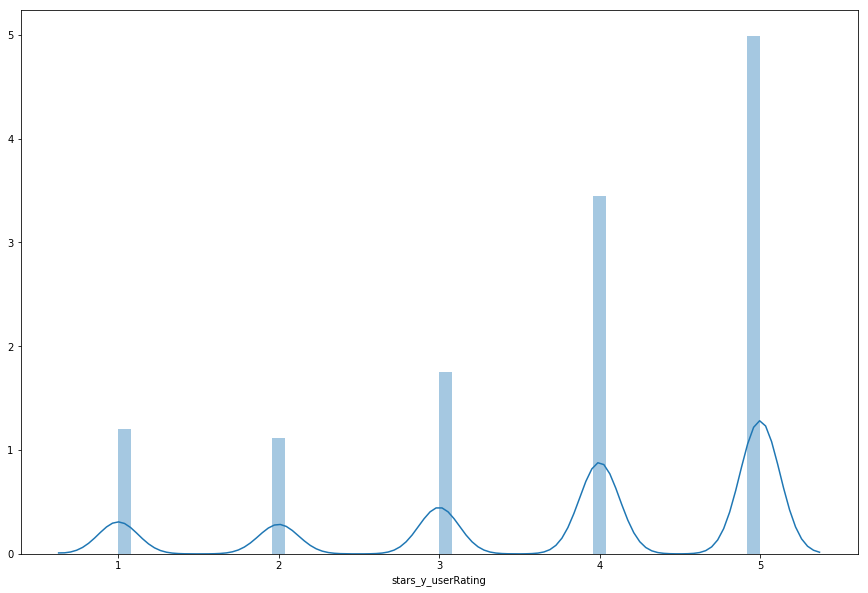

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_restaurant_LA['stars_y_userRating'])
#As we can observe that most of the time the value is either 4 or 5.

In [93]:
#split 80% of the data to training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GaussianNB

In [10]:
#Create Navive Bayes model using sklearn
GaussianNBmodel = GaussianNB()
GaussianNBmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
y_pred=GaussianNBmodel.predict(X_test)
y_pred

array([4, 3, 2, ..., 4, 5, 5])

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head(25)

,Actual,Predicted
10224,4,4
151844,1,3
5616,3,2
2332,4,4
175718,3,4
55870,4,5
127875,4,4
55235,2,2
168359,4,5
134644,3,3


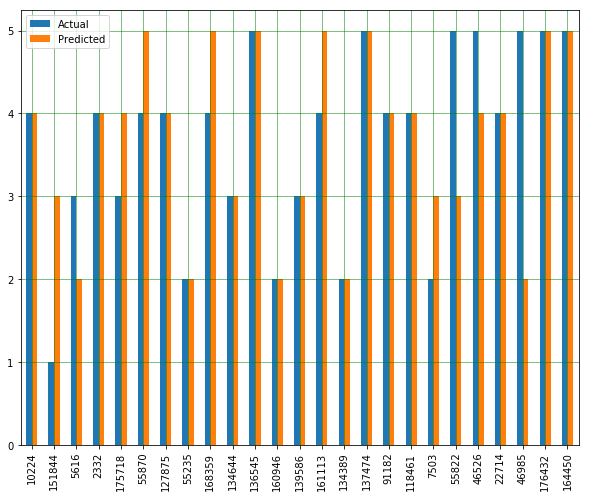

In [13]:
#plot 25 rows for comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [14]:
#finding the values for MAE, MSE, and RMSE.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3451082348951563
Mean Squared Error: 0.4648731136607698
Root Mean Squared Error: 0.6818160409236276


In [15]:
# To further improve accuracy, use k-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
GaussianNB_crossVal = GaussianNB()
cv_scores = cross_val_score(GaussianNB_crossVal, X, y, cv=10,n_jobs=-1)
print('Accuracy Scores', cv_scores)
print('Average Accuracy Scores :', cv_scores.mean())

cv_scores1 = cross_val_score(GaussianNB_crossVal, X, y, cv=10,n_jobs=-1, scoring='neg_mean_absolute_error')
cv_scores2=cross_val_score(GaussianNB_crossVal, X, y, cv=10,n_jobs=-1, scoring='neg_mean_squared_error')
print('neg_mean_absolute_error', abs(cv_scores1))
print('Average Mean Absolute Error :', abs(cv_scores1.mean()))
print('neg_mean_squared_error', abs(cv_scores2))
print('Average Mean Squared Error :',abs(cv_scores2.mean()))
rmse=np.sqrt(abs(cv_scores2))
print('Root Mean Squared Error', rmse)
print('Average Root Mean Squared Error :', rmse.mean())
#output is the accuracy of each fold.

Accuracy Scores [0.5749887  0.60466825 0.63688256 0.67621793 0.69332504 0.71800814
 0.73003222 0.78378837 0.78904528 0.80922503]
Average Accuracy Scores : 0.7016181509924684
neg_mean_absolute_error [0.50367315 0.46450774 0.42737651 0.38182435 0.36059459 0.32404477
 0.30670963 0.24283534 0.2436267  0.23254762]
Average Mean Absolute Error : 0.34877403919804095
neg_mean_squared_error [0.67975814 0.62512716 0.57273652 0.51395953 0.48776352 0.4223943
 0.39364649 0.30523995 0.3269459  0.33757278]
Average Mean Squared Error : 0.46651443003965304
Root Mean Squared Error [0.82447446 0.79064984 0.75679358 0.71690971 0.69840069 0.64991869
 0.62741253 0.55248525 0.57179184 0.58101014]
Average Root Mean Squared Error : 0.6769846720921406


# KNN

In [16]:
#train model using K-nearest neighbors(KNeighborsClassifier) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,stratify=y)
print ('X_train.shape:',X_train.shape)
print ('X_test.shape:',X_test.shape)


X_train.shape: (141541, 7)
X_test.shape: (35386, 7)


In [17]:
#it's important to pre-process data with MinMax scaling, 
#in order to normalize the data set. 
#The data in our data set are spread across a wide range of values, 
#which might result in various features affecting the final result more than the other features.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
#run knn using initial k value range from 1-10
k_range = range(900, 1000, 5)

scores_mse = []
scores_mae = []
scores_accuracy=[]

# We use a loop through the range 1 to 19
# We append the scores in the dictionary
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k,n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mae_knn=mean_absolute_error(y_test,y_pred)
    mse_knn=mean_squared_error(y_test,y_pred)
    accuracy_knn=accuracy_score(y_test,y_pred)
    scores_mse.append((k,mse_knn))
    scores_mae.append((k,mae_knn))
    scores_accuracy.append((k,accuracy_knn))

print("Scores MAE :",  scores_mae, '\n' )
print("Scores MSE :",  scores_mse, '\n' )
print("Accuracy :",  scores_accuracy, '\n' )


Scores MAE : [(900, 0.2703046402532075), (905, 0.27044593907194936), (910, 0.270417679308201), (915, 0.2705872378906912), (920, 0.27036115978070424), (925, 0.27036115978070424), (930, 0.2705307183631945), (935, 0.2703894195444526), (940, 0.27036115978070424), (945, 0.27064375741818797), (950, 0.2707002769456847), (955, 0.2707285367094331), (960, 0.27092635505567175), (965, 0.2708980952919234), (970, 0.27101113434691687), (975, 0.2710676538744136), (980, 0.27135025151189734), (985, 0.2712937319844006), (990, 0.27151981009438764), (995, 0.2713785112756457)] 

Scores MSE : [(900, 0.34197140111908664), (905, 0.34216921946532525), (910, 0.3421409597015769), (915, 0.3423670378115639), (920, 0.3421409597015769), (925, 0.34208444017408013), (930, 0.34208444017408013), (935, 0.34166054371785454), (940, 0.3415757644266094), (945, 0.34208444017408013), (950, 0.3421409597015769), (955, 0.3421126999378285), (960, 0.3421974792290736), (965, 0.342225738992822), (970, 0.34216921946532525), (975, 0.342

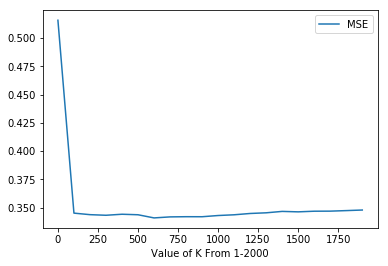

In [252]:
# locate the best vakue for K for K range between 1- 2000
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot([i[0] for i in scores_mse],[i[1] for i in scores_mse], label='MSE')
#plt.plot([i[0] for i in scores_accuracy],[i[1] for i in scores_accuracy], label='Accuracy')
plt.xlabel('Value of K From 1-2000')
plt.legend(loc="upper right")

#plt.ylabel('Mean Square Error')

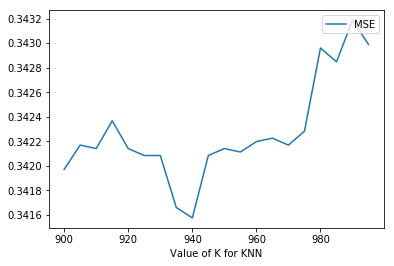

In [255]:
# locate the best vakue for K
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot([i[0] for i in scores_mse],[i[1] for i in scores_mse], label='MSE')
#plt.plot([i[0] for i in scores_accuracy],[i[1] for i in scores_accuracy], label='Accuracy')
plt.xlabel('Value of K for KNN')
plt.legend(loc="upper right")

#plt.ylabel('Mean Square Error')

from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": np.arange(935, 945)}


knn = neighbors.KNeighborsClassifier()

knn_gscv = GridSearchCV(knn, param_grid, cv=10, n_jobs=-1)
knn_gscv.fit(x_scaled,y)
#check top performing n_neighbors value
print (knn_gscv.best_params_)
print(knn_gscv.best_estimator_)
print (knn_gscv.best_score_)


In [38]:
#perform 10 fold cross validation over a range k values from 1-19. 
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in [105,106,107,108,109,110]:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(abs(scores.mean()))
print (cv_scores)

[0.3333379183040644, 0.33353571279164135, 0.3337829767417926, 0.333952543609357, 0.3330058327302612, 0.3335286441533485]


In [41]:
#perform 10 fold cross validation over a range k values from 1-19. 
# empty list that will hold cv scores
cv_scores_mae = []
# perform 10-fold cross validation
for k in [105,106,107,108,109,110]:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores_mae.append(abs(scores.mean()))
print (cv_scores_mae)

[0.2594088227235549, 0.259649017038711, 0.2597832497203943, 0.25992455203411036, 0.2594158738858483, 0.2597691299196666]


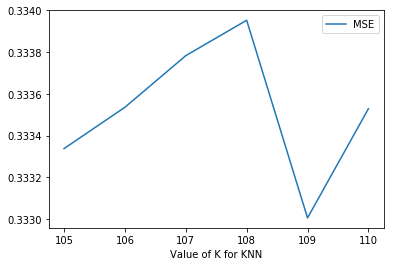

In [40]:
# locate the best vakue for K
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot([n for n in [105,106,107,108,109,110]],[i for i in cv_scores], label='MSE')
#plt.plot([i[0] for i in scores_accuracy],[i[1] for i in scores_accuracy], label='Accuracy')
plt.xlabel('Value of K for KNN')
plt.legend(loc="upper right")

#plt.ylabel('Mean Square Error')

The optimal number of neighbors is 19


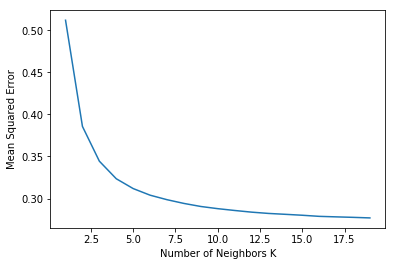

In [219]:
# changing to misclassification error
MSE = [abs(x) for x in cv_scores]

# determining best k
optimal_k = num_neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(num_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Squared Error')
plt.show()

In [42]:
#train Random Forest Classifier
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier

In [47]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(4,13),
            'n_estimators': (50,100,200,300),
        },
        cv=5, scoring='neg_mean_squared_error',verbose=0,  n_jobs=-1) 
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
#    best_mse=grid_result.best_score_

    rfr = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
                
# Perform K-Fold CV
    scoring = {
               'negMAE': 'neg_mean_absolute_error',
               'negMSE': 'neg_mean_squared_error'}
    scores = cross_validate(rfr, X, y, cv=5, scoring=scoring)

    print ('MAE :',abs(scores['test_negMAE'].mean()), '|MSE :',abs(scores['test_negMSE'].mean()), 'best_param', best_params)
    return grid_result
    #return best_params, best_mse
 

In [48]:
#predictions = cross_val_predict(rfr, X, y, cv=5)
rfr_model_result= rfr_model(X, y)


MAE : 0.26318338566497773 |MSE : 0.332284190137757 best_param {'max_depth': 12, 'n_estimators': 300}


In [49]:
import pickle
filname='rfr_model_result.pkl'
pickle.dump(rfr_model_result,open(filname,'wb'))

In [103]:
from sklearn.metrics import confusion_matrix
rfc = RandomForestClassifier(max_depth=12, n_estimators=300,random_state=False, verbose=False)
rfc_fit = rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
y_pred
print (" Confusion matrix ", confusion_matrix(y_test,y_pred ))


 Confusion matrix  [[ 2805   191   354    43     1]
 [   72  2029   780   247     1]
 [   44   132  3177  1529    65]
 [    3    27   783  8055   804]
 [    1     5   305  2452 11481]]


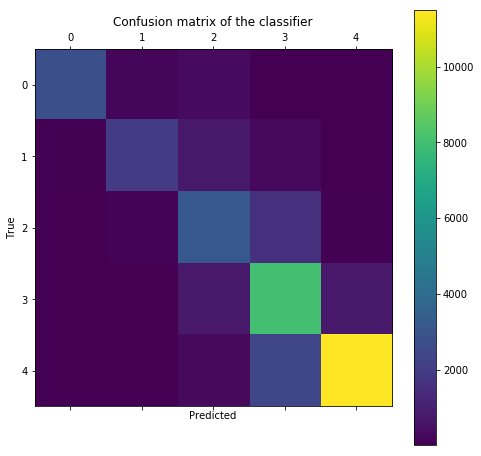

In [127]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test,y_pred ))
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

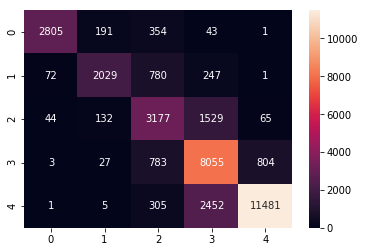

In [115]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred ), 
            annot=True,fmt='g',
            xticklabels=pd.DataFrame(confusion_matrix(y_test,y_pred )).columns,
            yticklabels=pd.DataFrame(confusion_matrix(y_test,y_pred )).columns)

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.83      0.89      3394
           2       0.85      0.65      0.74      3129
           3       0.59      0.64      0.61      4947
           4       0.65      0.83      0.73      9672
           5       0.93      0.81      0.86     14244

   micro avg       0.78      0.78      0.78     35386
   macro avg       0.80      0.75      0.77     35386
weighted avg       0.80      0.78      0.78     35386



In [132]:
accuracy_score(y_test, y_pred, normalize=False)

27547

In [133]:
y_test.shape

(35386,)

In [134]:
print('Random Forest Model Accuracy :',(accuracy_score(y_test, y_pred, normalize=False)/y_test.shape[0])*100)

Random Forest Model Accuracy : 77.84717119764879
